# Cassification: k-Nearest Neighbors

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('telemarketing_train_preprocess.csv')

In [2]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0


## Exploratory Data Analysis

In [3]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   duration                       15000 non-null  float64
 2   campaign                       15000 non-null  float64
 3   pdays                          15000 non-null  float64
 4   previous                       15000 non-null  float64
 5   emp.var.rate                   15000 non-null  float64
 6   cons.price.idx                 15000 non-null  float64
 7   cons.conf.idx                  15000 non-null  float64
 8   euribor3m                      15000 non-null  float64
 9   nr.employed                    15000 non-null  float64
 10  marital_divorced               15000 non-null  int64  
 11  marital_married                15000 non-null  int64  
 12  marital_single                 15000 non-null 

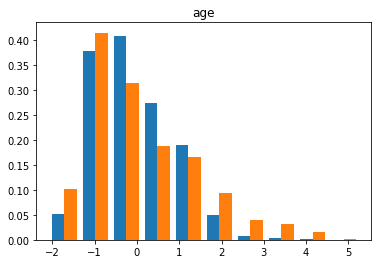

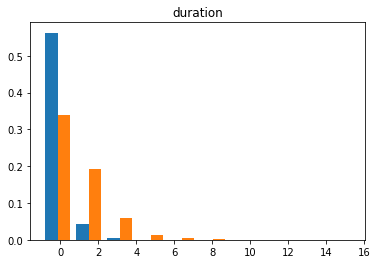

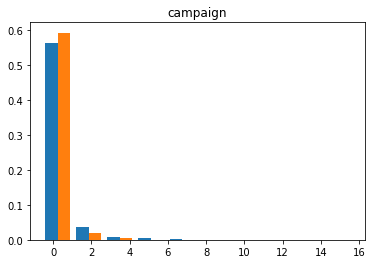

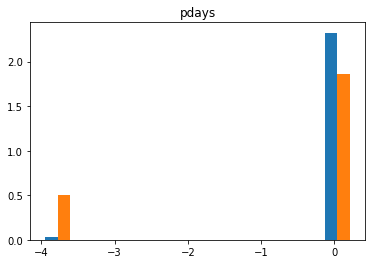

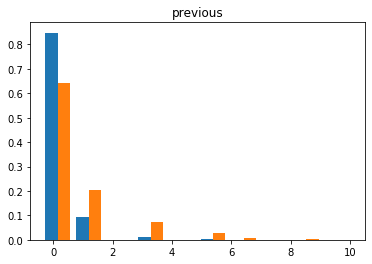

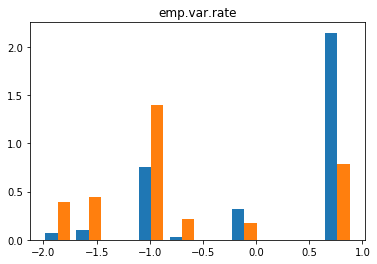

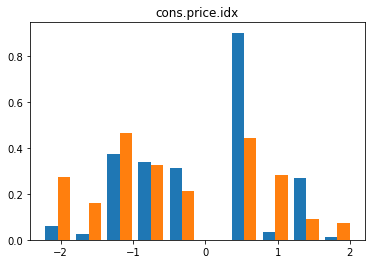

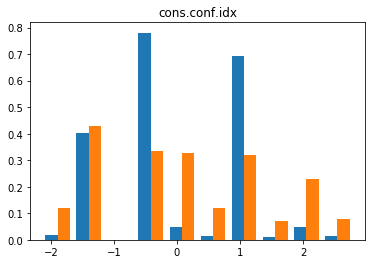

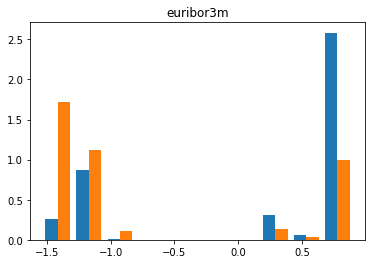

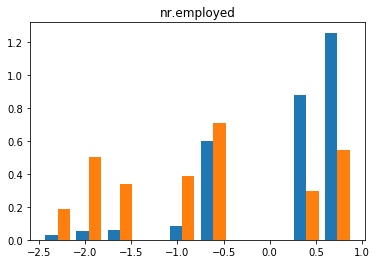

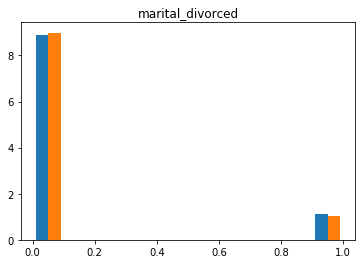

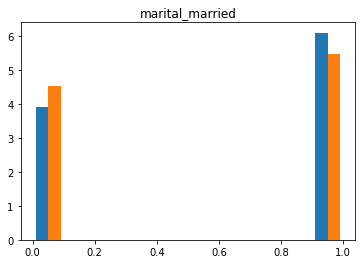

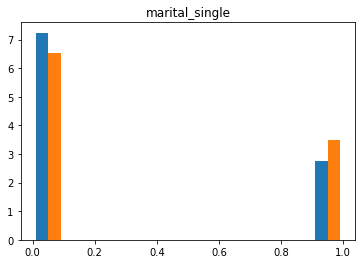

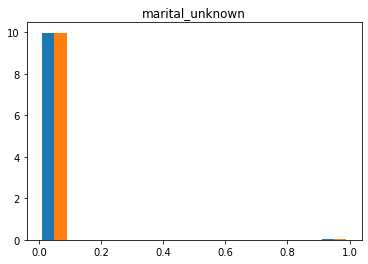

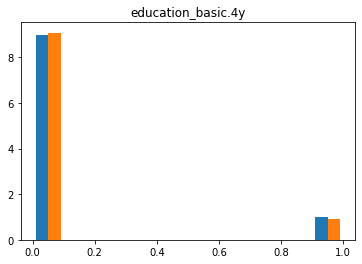

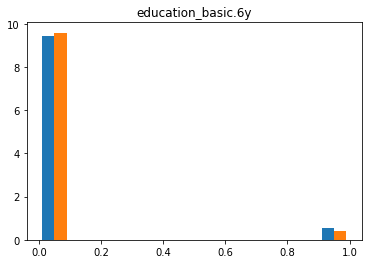

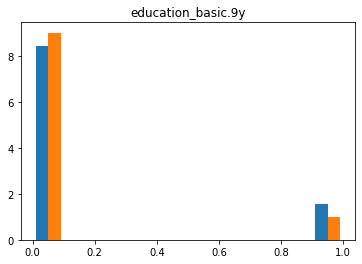

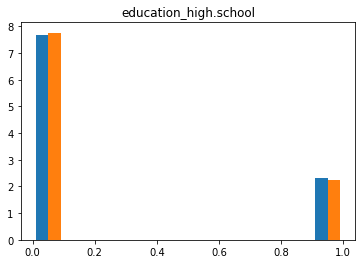

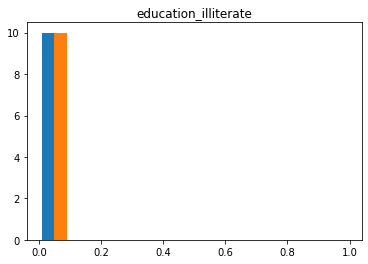

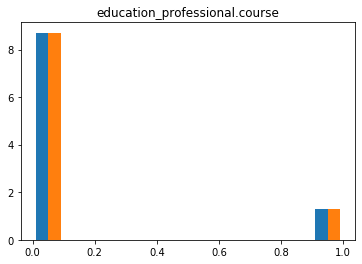

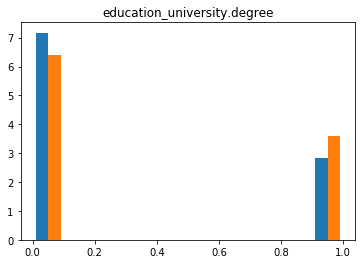

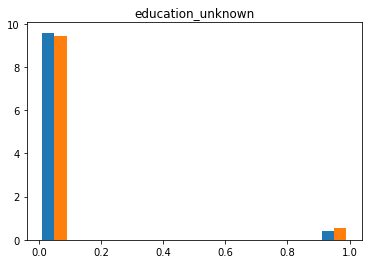

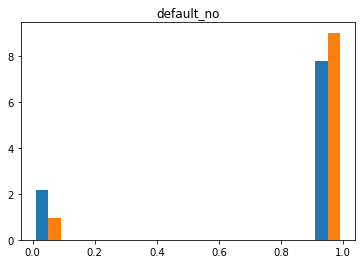

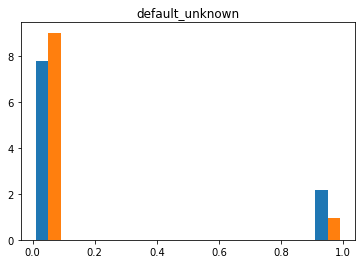

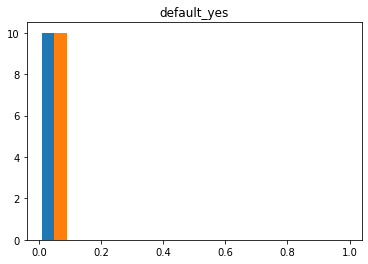

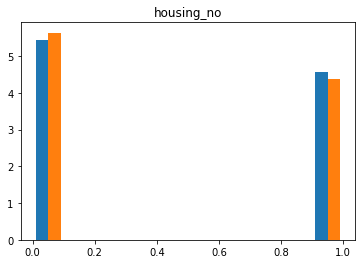

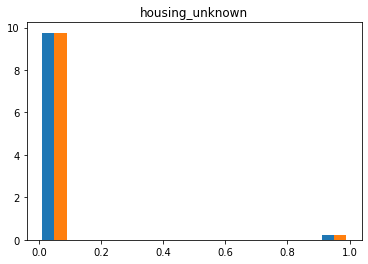

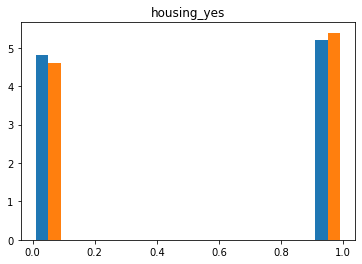

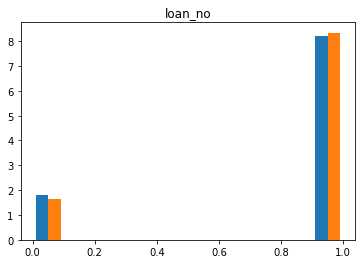

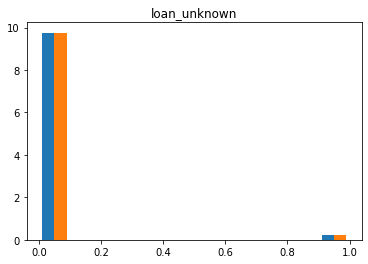

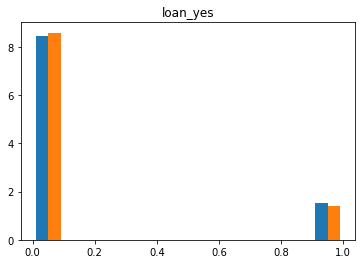

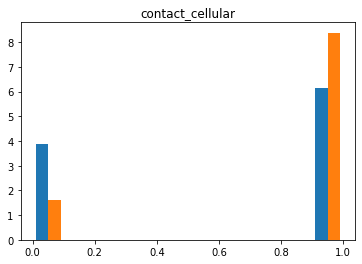

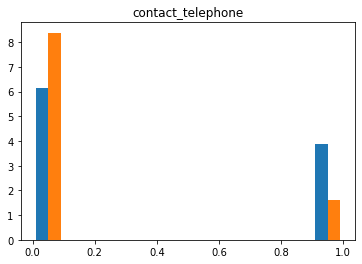

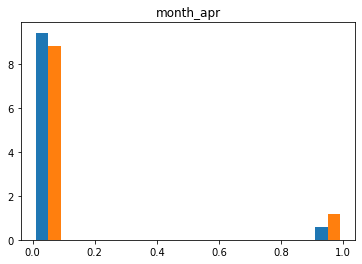

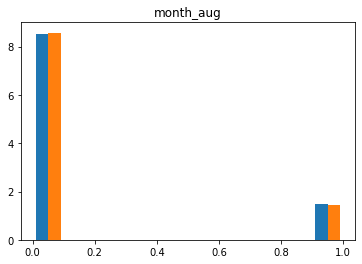

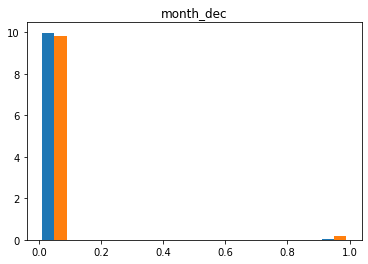

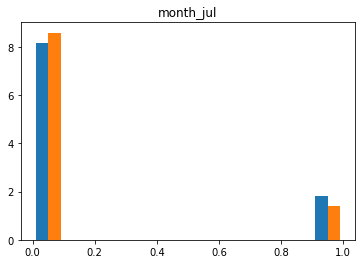

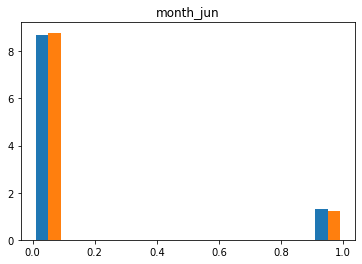

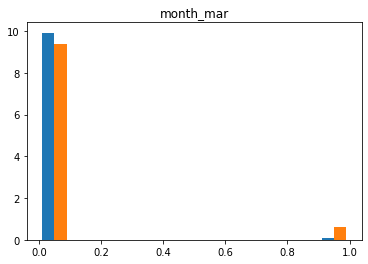

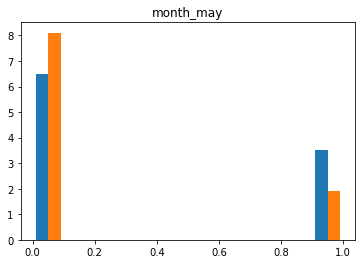

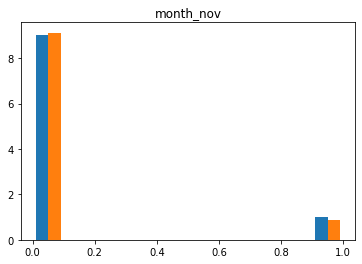

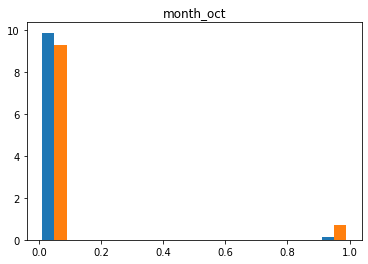

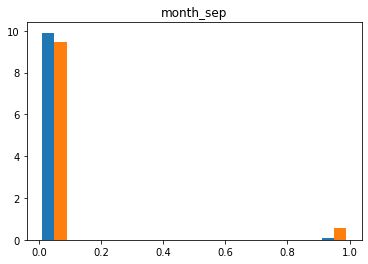

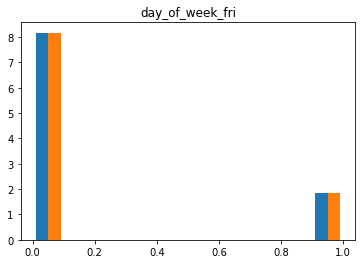

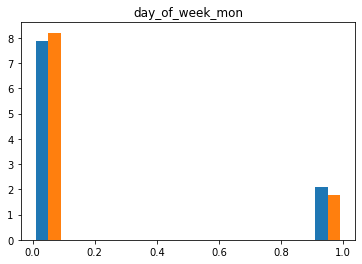

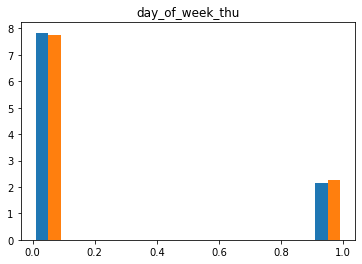

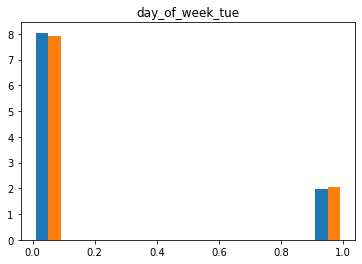

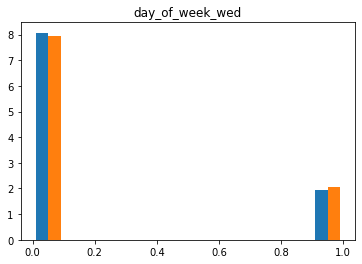

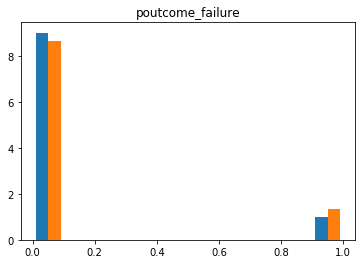

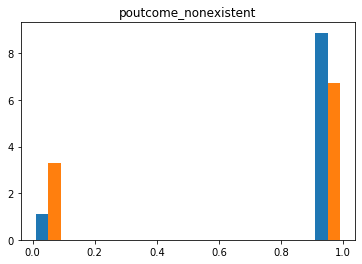

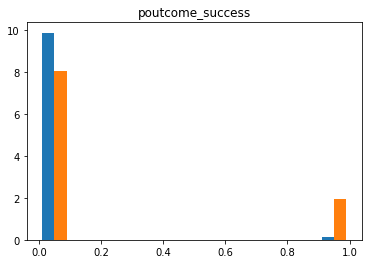

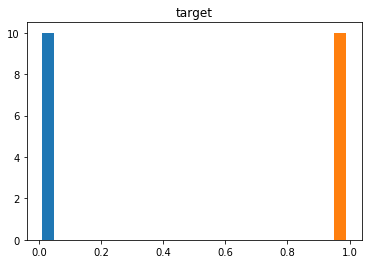

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

X=df

X0 = X[X['target']==0]
X1 = X[X['target']==1]


fig = plt.figure()
for i in X.columns :
    plt.hist([X0[i],X1[i]],density=True)
    plt.title(i)
    plt.show()


target
0    11552
1     3448
dtype: int64


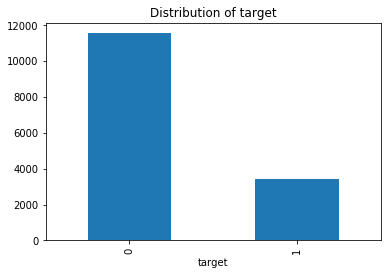

In [6]:
#Print class freq. through pandas: we group the data by the column target and we count the number of rows 
target_dist=df.groupby('target').size()
print(target_dist)

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of target')

## Data Preparation 

### Separate Train/Test sets

In [7]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.991498,-0.146750,-0.571300,0.252494,-0.378985,0.728330,0.745760,0.830517,0.794858,0.429467,...,0,0,0,0,1,0,0,1,0,0
14996,1.172839,-0.440197,6.772887,0.252494,-0.378985,0.910934,0.618604,-0.467378,0.852827,0.901546,...,0,0,0,0,1,0,0,1,0,0
14997,0.084795,-0.446866,0.974844,0.252494,1.366417,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913,...,0,1,0,0,0,0,1,0,0,0
14998,-0.549897,-0.716970,0.201772,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,1,0,0,0,0,0,1,0,0


In [10]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    #stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape,X_test.shape)
Jupyter Notebook
10_Classification_KNN Last Checkpoint: 05/28/2020 (autosaved) Current Kernel Logo 

Python 3

    File
    Edit
    View
    Insert
    Cell
    Kernel
    Widgets
    Help

Cassification: k-Nearest Neighbors
Data import

import pandas as pd

df = pd.read_csv('telemarketing_train_preprocess.csv')

df.head()

	age 	duration 	campaign 	pdays 	previous 	emp.var.rate 	cons.price.idx 	cons.conf.idx 	euribor3m 	nr.employed 	... 	month_sep 	day_of_week_fri 	day_of_week_mon 	day_of_week_thu 	day_of_week_tue 	day_of_week_wed 	poutcome_failure 	poutcome_nonexistent 	poutcome_success 	target
0 	1.444850 	-0.746982 	-0.571300 	-3.969061 	1.366417 	-1.706389 	-2.254135 	1.860592 	-1.400757 	-1.031304 	... 	0 	0 	0 	0 	0 	1 	0 	0 	1 	1
1 	1.082169 	0.100012 	-0.571300 	0.252494 	-0.378985 	-1.706389 	-0.979221 	-0.075950 	-1.187102 	-1.031304 	... 	0 	0 	1 	0 	0 	0 	0 	1 	0 	1
2 	0.447476 	-0.363501 	0.974844 	0.252494 	-0.378985 	0.910934 	-0.174453 	0.892321 	0.854483 	0.901546 	... 	0 	0 	0 	0 	0 	1 	0 	1 	0 	0
3 	-0.731238 	-0.200104 	-0.184764 	0.252494 	-0.378985 	0.728330 	0.745760 	0.830517 	0.795410 	0.429467 	... 	0 	0 	0 	0 	1 	0 	0 	1 	0 	0
4 	-0.731238 	2.884420 	-0.184764 	0.252494 	-0.378985 	-0.002086 	-0.582693 	-0.323168 	0.333873 	0.490545 	... 	0 	1 	0 	0 	0 	0 	0 	1 	0 	0

5 rows × 52 columns
Exploratory Data Analysis

#gives information about the data types,columns, null value counts, memory usage etc

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   duration                       15000 non-null  float64
 2   campaign                       15000 non-null  float64
 3   pdays                          15000 non-null  float64
 4   previous                       15000 non-null  float64
 5   emp.var.rate                   15000 non-null  float64
 6   cons.price.idx                 15000 non-null  float64
 7   cons.conf.idx                  15000 non-null  float64
 8   euribor3m                      15000 non-null  float64
 9   nr.employed                    15000 non-null  float64
 10  marital_divorced               15000 non-null  int64  
 11  marital_married                15000 non-null  int64  
 12  marital_single                 15000 non-null  int64  
 13  marital_unknown                15000 non-null  int64  
 14  education_basic.4y             15000 non-null  int64  
 15  education_basic.6y             15000 non-null  int64  
 16  education_basic.9y             15000 non-null  int64  
 17  education_high.school          15000 non-null  int64  
 18  education_illiterate           15000 non-null  int64  
 19  education_professional.course  15000 non-null  int64  
 20  education_university.degree    15000 non-null  int64  
 21  education_unknown              15000 non-null  int64  
 22  default_no                     15000 non-null  int64  
 23  default_unknown                15000 non-null  int64  
 24  default_yes                    15000 non-null  int64  
 25  housing_no                     15000 non-null  int64  
 26  housing_unknown                15000 non-null  int64  
 27  housing_yes                    15000 non-null  int64  
 28  loan_no                        15000 non-null  int64  
 29  loan_unknown                   15000 non-null  int64  
 30  loan_yes                       15000 non-null  int64  
 31  contact_cellular               15000 non-null  int64  
 32  contact_telephone              15000 non-null  int64  
 33  month_apr                      15000 non-null  int64  
 34  month_aug                      15000 non-null  int64  
 35  month_dec                      15000 non-null  int64  
 36  month_jul                      15000 non-null  int64  
 37  month_jun                      15000 non-null  int64  
 38  month_mar                      15000 non-null  int64  
 39  month_may                      15000 non-null  int64  
 40  month_nov                      15000 non-null  int64  
 41  month_oct                      15000 non-null  int64  
 42  month_sep                      15000 non-null  int64  
 43  day_of_week_fri                15000 non-null  int64  
 44  day_of_week_mon                15000 non-null  int64  
 45  day_of_week_thu                15000 non-null  int64  
 46  day_of_week_tue                15000 non-null  int64  
 47  day_of_week_wed                15000 non-null  int64  
 48  poutcome_failure               15000 non-null  int64  
 49  poutcome_nonexistent           15000 non-null  int64  
 50  poutcome_success               15000 non-null  int64  
 51  target                         15000 non-null  int64  
dtypes: float64(10), int64(42)
memory usage: 6.0 MB

%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

​

X=df

​

X0 = X[X['target']==0]

X1 = X[X['target']==1]

​

​

fig = plt.figure()

for i in X.columns :

    plt.hist([X0[i],X1[i]],density=True)

    plt.title(i)

    plt.show()

​

#Print class freq. through pandas: we group the data by the column target and we count the number of rows 

target_dist=df.groupby('target').size()

print(target_dist)

​

#some imports to plot 

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

​

#Visualize Class Counts

target_dist.plot.bar(x='',y='',title='Distribution of target')

target
0    11552
1     3448
dtype: int64

<matplotlib.axes._subplots.AxesSubplot at 0x7f04d1cd8110>

Data Preparation
Separate Train/Test sets

df

	age 	duration 	campaign 	pdays 	previous 	emp.var.rate 	cons.price.idx 	cons.conf.idx 	euribor3m 	nr.employed 	... 	month_sep 	day_of_week_fri 	day_of_week_mon 	day_of_week_thu 	day_of_week_tue 	day_of_week_wed 	poutcome_failure 	poutcome_nonexistent 	poutcome_success 	target
0 	1.444850 	-0.746982 	-0.571300 	-3.969061 	1.366417 	-1.706389 	-2.254135 	1.860592 	-1.400757 	-1.031304 	... 	0 	0 	0 	0 	0 	1 	0 	0 	1 	1
1 	1.082169 	0.100012 	-0.571300 	0.252494 	-0.378985 	-1.706389 	-0.979221 	-0.075950 	-1.187102 	-1.031304 	... 	0 	0 	1 	0 	0 	0 	0 	1 	0 	1
2 	0.447476 	-0.363501 	0.974844 	0.252494 	-0.378985 	0.910934 	-0.174453 	0.892321 	0.854483 	0.901546 	... 	0 	0 	0 	0 	0 	1 	0 	1 	0 	0
3 	-0.731238 	-0.200104 	-0.184764 	0.252494 	-0.378985 	0.728330 	0.745760 	0.830517 	0.795410 	0.429467 	... 	0 	0 	0 	0 	1 	0 	0 	1 	0 	0
4 	-0.731238 	2.884420 	-0.184764 	0.252494 	-0.378985 	-0.002086 	-0.582693 	-0.323168 	0.333873 	0.490545 	... 	0 	1 	0 	0 	0 	0 	0 	1 	0 	0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
14995 	0.991498 	-0.146750 	-0.571300 	0.252494 	-0.378985 	0.728330 	0.745760 	0.830517 	0.794858 	0.429467 	... 	0 	0 	0 	0 	1 	0 	0 	1 	0 	0
14996 	1.172839 	-0.440197 	6.772887 	0.252494 	-0.378985 	0.910934 	0.618604 	-0.467378 	0.852827 	0.901546 	... 	0 	0 	0 	0 	1 	0 	0 	1 	0 	0
14997 	0.084795 	-0.446866 	0.974844 	0.252494 	1.366417 	-1.036841 	-1.096339 	-1.188431 	-1.195936 	-0.739913 	... 	0 	1 	0 	0 	0 	0 	1 	0 	0 	0
14998 	-0.549897 	-0.716970 	0.201772 	0.252494 	-0.378985 	0.910934 	-0.174453 	0.892321 	0.854483 	0.901546 	... 	0 	1 	0 	0 	0 	0 	0 	1 	0 	0
14999 	0.991498 	-0.460205 	-0.184764 	0.252494 	-0.378985 	-1.706389 	-0.979221 	-0.075950 	-1.185998 	-1.031304 	... 	0 	1 	0 	0 	0 	0 	0 	1 	0 	1

15000 rows × 52 columns

#Separate X and y (explanatory variables and target variable)

X = df.iloc[:,0:-1]

y = df.iloc[:,-1] #[-1]]

​

#X.head()

y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

from sklearn.model_selection import train_test_split

​

#SPLIT DATA INTO TRAIN AND TEST SET

X_train, X_test, y_train, y_test = train_test_split(X, y, 

                                                    test_size =0.30, #by default is 75%-25%

                                                    #shuffle is set True by default,

                                                    stratify=y,

                                                    random_state= 123) #fix random seed for replicability

​

print(X_train.shape,X_test.shape)

In [ ]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

In [ ]:
import matplotlib.pyplot as plt

x = X_train.iloc[:,0]
y = X_train.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

# A first model: K-Nearest Neighbor

The K-Nearest Neighbor classification model simply assign to new observation the most common value among its k-nearest neighbors

![KNN](KnnClassification.svg)

In [ ]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn3.predict(X_test)


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
#EVALUATE OUR PREDICTION
from sklearn import metrics

print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))


## Searching the best parameters

#### DEFINE YOUR GRIDSEARCH 

GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)

Some Parameters:

- estimator : estimator object.
- param_grid : dict or list of dictionaries
- scoring : scoring parameter
- n_jobs : Number of jobs to run in parallel. -1 means using all processors
- cv : cross-validation generator (default 3-fold cross validation)
- verbose : Controls the verbosity: the higher, the more messages.



In [ ]:
#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,60,5)}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)

In [ ]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

In [ ]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

In [ ]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

In [ ]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
#This is your prediction on the TEST SET
y_pred

In [ ]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


In [ ]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format


### ROC Curve

In [ ]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Apply PCA

In [ ]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(scaled_X))

In [ ]:
explained_variance=pd.DataFrame(pca.explained_variance_ratio_)
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_variance.transpose())

In [ ]:
pd.DataFrame(pca.components_,columns=X.columns)

In [ ]:
X_pca = pd.DataFrame(data = pca.transform(X))

X_train_pca = pd.DataFrame(data = pca.transform(X_train))

X_test_pca = pd.DataFrame(data = pca.transform(X_test))


In [ ]:
import matplotlib.pyplot as plt

x = X_train_pca.iloc[:,0]
y = X_train_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = X_test_pca.iloc[:,0]
y = X_test_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_test )
plt.show()

In [ ]:
#DEFINE  PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40,5)}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)
# We use just the two first PC
gs = gs.fit(X_train_pca.iloc[:,:2], y_train) 

#Prediction
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_pca.iloc[:,:2])

print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


In [ ]:
#Using the two first PC
X_train_pca_2=X_train_pca.iloc[:,:2]
X_test_pca_2=X_test_pca.iloc[:,:2]

model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_pca_2, y_train)
y_pred = model.predict(X_test_pca_2)

y_probs = model.predict_proba(X_test_pca_2) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [ ]:
# and with all PC

model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

y_probs = model.predict_proba(X_test_pca) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)